<a href="https://colab.research.google.com/github/AbirHentati/Prodigy-InfoTech/blob/main/creditcard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix ,accuracy_score

#**Load data**

In [ ]:
#import the dataset
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37717,39076,1.117749,-1.544665,-0.145357,-1.307482,-1.392833,-0.630833,-0.563659,-0.038716,-2.173892,...,-0.334155,-1.108220,0.070461,0.115485,0.078726,-0.460844,-0.029143,0.029028,183.19,0.0
37718,39076,0.758729,-0.483875,0.125488,1.449159,-0.639231,-0.805011,0.406994,-0.221212,0.068777,...,0.210712,0.063091,-0.316636,0.394472,0.558720,-0.304812,-0.033008,0.063331,250.00,0.0
37719,39076,-0.474907,0.835804,0.075878,-1.251283,2.492736,3.385419,0.169507,0.934749,-0.584224,...,-0.270398,-0.866353,-0.085720,0.986274,-0.082934,0.084198,0.310936,0.170342,1.49,0.0
37720,39077,-2.682780,-2.028562,1.745223,-1.157952,-0.143692,-0.807503,-1.154141,0.436917,-0.293442,...,0.353396,0.968145,-0.776459,0.182662,-0.000427,-0.209058,0.256991,-0.585781,102.00,0.0


In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37722 entries, 0 to 37721
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    37722 non-null  int64  
 1   V1      37722 non-null  float64
 2   V2      37722 non-null  float64
 3   V3      37722 non-null  float64
 4   V4      37722 non-null  float64
 5   V5      37722 non-null  float64
 6   V6      37722 non-null  float64
 7   V7      37721 non-null  float64
 8   V8      37721 non-null  float64
 9   V9      37721 non-null  float64
 10  V10     37721 non-null  float64
 11  V11     37721 non-null  float64
 12  V12     37721 non-null  float64
 13  V13     37721 non-null  float64
 14  V14     37721 non-null  float64
 15  V15     37721 non-null  float64
 16  V16     37721 non-null  float64
 17  V17     37721 non-null  float64
 18  V18     37721 non-null  float64
 19  V19     37721 non-null  float64
 20  V20     37721 non-null  float64
 21  V21     37721 non-null  float64
 22

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,37722.000000,37722.000000,37722.000000,37722.000000,37722.000000,37722.000000,37722.000000,37721.000000,37721.000000,37721.000000,...,37721.000000,37721.000000,37721.000000,37721.000000,37721.000000,37721.000000,37721.000000,37721.000000,37721.000000,37721.000000
mean,24766.905519,-0.207438,0.060003,0.717371,0.192425,-0.223913,0.099322,-0.113878,0.036184,0.234569,...,-0.030242,-0.112267,-0.041283,0.006498,0.136187,0.021816,0.009257,0.003928,86.029572,0.002731
std,12527.587139,1.826290,1.542122,1.518753,1.404199,1.379541,1.306858,1.250118,1.229029,1.230965,...,0.760639,0.639297,0.550248,0.593787,0.435848,0.505541,0.386284,0.299030,232.994577,0.052184
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-42.147898,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.438650,-8.567638,-9.617915,0.000000,0.000000
25%,13890.000000,-0.962070,-0.514064,0.239253,-0.715389,-0.827569,-0.639691,-0.595964,-0.154250,-0.543033,...,-0.238364,-0.535135,-0.178672,-0.327777,-0.127541,-0.331097,-0.063228,-0.007002,7.190000,0.000000
50%,29826.000000,-0.231670,0.107303,0.822135,0.188408,-0.262141,-0.159274,-0.073638,0.045764,0.108784,...,-0.079107,-0.085964,-0.052248,0.061264,0.176033,-0.064077,0.008660,0.021275,22.820000,0.000000
75%,34937.750000,1.161603,0.748540,1.451850,1.073459,0.300384,0.486727,0.434617,0.310800,0.960733,...,0.098007,0.298240,0.076458,0.398894,0.421271,0.301099,0.085603,0.075752,77.750000,0.000000
max,39077.000000,1.960497,16.713389,4.101716,13.143668,34.099309,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,5.678671,7879.420000,1.000000


#**Preprocessing**

In [ ]:
#chacking is there any nun value are or not
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

#encoding
le = LabelEncoder()
le

LabelEncoder()

In [ ]:
from pandas.api.types import is_numeric_dtype

for i in df.columns:
    if not is_numeric_dtype(df[i]):
        df[i] = le.fit_transform(df[i])

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


#**visualisation**

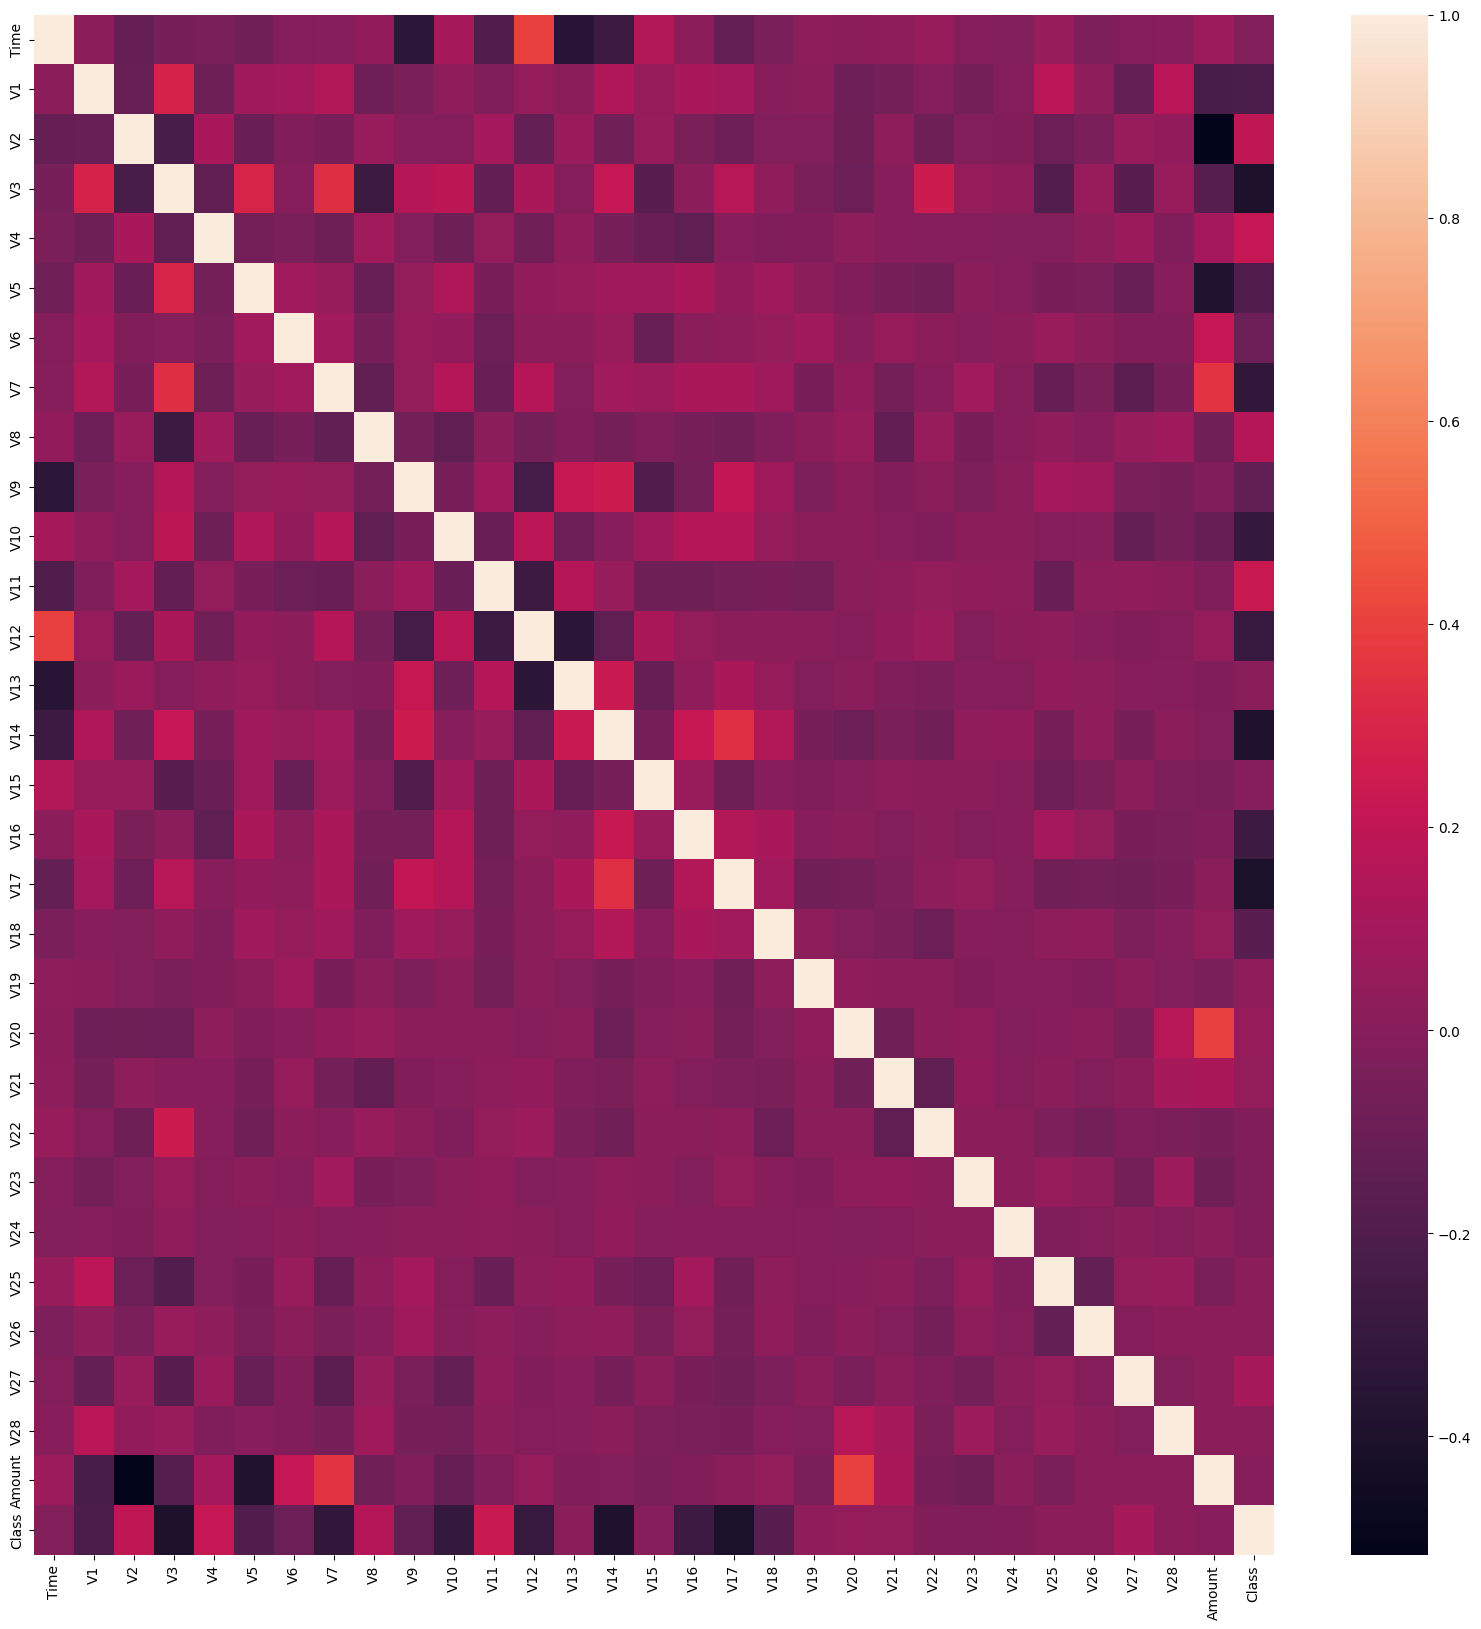

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corrmat = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat)
plt.show()

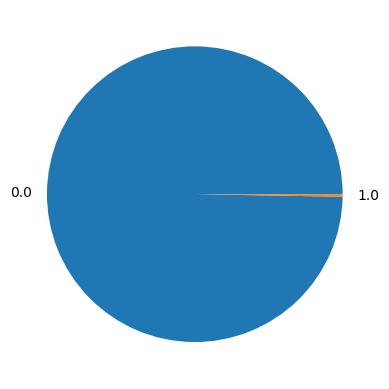

In [ ]:
values = df["Class"].value_counts()
plt.pie(values, labels=values.index )
plt.show()

In [ ]:
#Get the Fraud and the normal dataset

fraud = df[df['Class']==1]
normal = df[df['Class']==0]
print(fraud.shape,normal.shape)

(103, 31) (37618, 31)


In [ ]:
#comparing the two transaction classes
fraud.Amount.describe()

count     103.000000
mean       90.471165
std       247.173335
min         0.000000
25%         1.000000
50%         3.760000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
normal.Amount.describe()

count    37618.000000
mean        86.017411
std        232.957939
min          0.000000
25%          7.300000
50%         22.880000
75%         77.675000
max       7879.420000
Name: Amount, dtype: float64

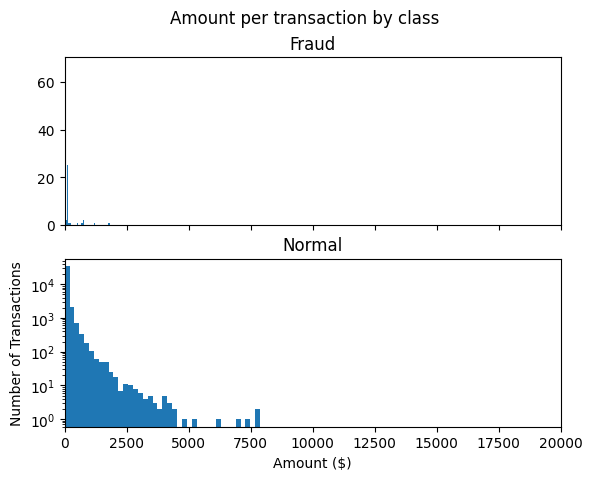

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 40
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

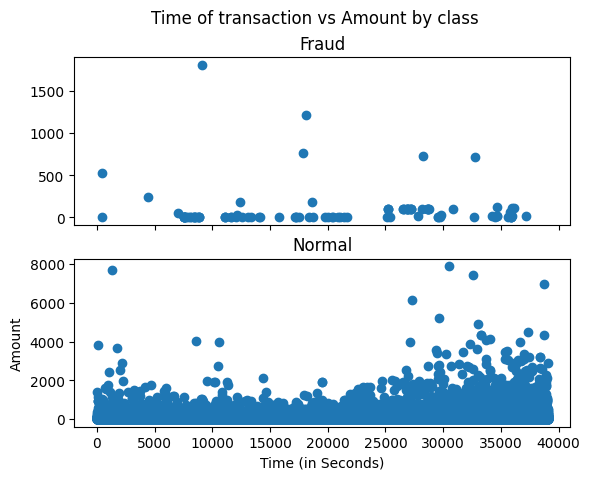

In [ ]:
# We Will check Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [ ]:
#Determine the number of fraud and valid transactions in the dataset

Fraud = df[df['Class']==1]

Valid = df[df['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(Valid)))

0.0027380509330639587
Fraud Cases : 103
Valid Cases : 37618


#**Classification algorithm**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.preprocessing import StandardScaler

# Data preprocessing
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

In [ ]:
# Splitting into features and target
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.impute import SimpleImputer

# Impute missing values in the features
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [ ]:
# Impute or remove NaN values in y_train
y_train_imputed = y_train.fillna(y_train.mean())

In [ ]:
print("Number of NaN values in X_train_scaled:", np.isnan(X_train_scaled).sum())
print("Number of NaN values in X_test_scaled:", np.isnan(X_test_scaled).sum())

Number of NaN values in X_train_scaled: 0
Number of NaN values in X_test_scaled: 0


In [ ]:
# Model training and evaluation
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'Neural Network': MLPClassifier()
}

In [ ]:
import numpy as np

# Vérifiez s'il y a des valeurs manquantes dans y_test
missing_values = np.isnan(y_test)
print("Nombre de valeurs manquantes dans y_test :", np.sum(missing_values))

# OU remplacez les valeurs manquantes par une valeur appropriée, par exemple la moyenne
mean_y_test = np.nanmean(y_test)
y_test[np.isnan(y_test)] = mean_y_test

Nombre de valeurs manquantes dans y_test : 0


In [ ]:
# Convert continuous labels to binary labels
threshold = 0.5  # Set a threshold to determine fraud (1) and non-fraud (0)
y_train_binary = (y_train_imputed > threshold).astype(int)

# Model training and evaluation
results = {}
for name, model in models.items():
    # Fit the model to the training data with binary labels
    model.fit(X_train_scaled, y_train_binary)

    if isinstance(model, SVC) and not model.probability:
        # Use decision_function instead
        y_pred_scores = model.decision_function(X_test_scaled)
        y_pred_proba = (y_pred_scores - y_pred_scores.min()) / (y_pred_scores.max() - y_pred_scores.min())  # Normalize scores
    else:
        # Use predict_proba for other models
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Convertir les étiquettes de test en étiquettes binaires
    y_test_binary = (y_test > threshold).astype(int)

    # Calculer les métriques de performance
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test_binary, y_pred)
    precision, recall, _ = precision_recall_curve(y_test_binary, y_pred_proba)
    pr_auc = auc(recall, precision)


    results[name] = {'confusion_matrix': cm, 'precision_recall_auc': pr_auc}

In [ ]:
# Visualize results
for name, result in results.items():
    print(name)
    print("AUPRC:", result['precision_recall_auc'])
    print("Confusion Matrix:")
    print(result['confusion_matrix'])
    print()

Logistic Regression
AUPRC: 0.7266001711970764
Confusion Matrix:
[[7508    1]
 [  17   19]]

Random Forest
AUPRC: 0.8614257581235418
Confusion Matrix:
[[7508    1]
 [   8   28]]

Gradient Boosting
AUPRC: 0.8248954695977951
Confusion Matrix:
[[7507    2]
 [   6   30]]

Support Vector Machine
AUPRC: 0.8525781188274776
Confusion Matrix:
[[7508    1]
 [  14   22]]

Neural Network
AUPRC: 0.8590408686563705
Confusion Matrix:
[[7509    0]
 [   8   28]]



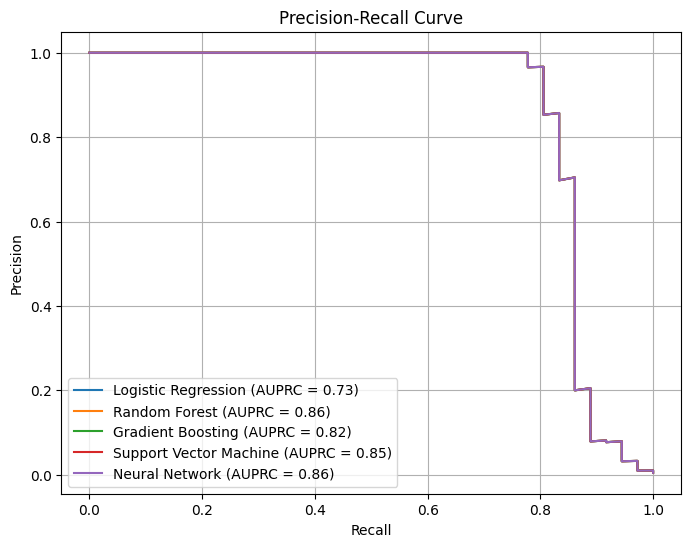

In [ ]:
plt.figure(figsize=(8, 6))

for name, result in results.items():
    precision, recall, _ = precision_recall_curve(y_test_binary, y_pred_proba)
    plt.plot(recall, precision, label=f"{name} (AUPRC = {result['precision_recall_auc']:.2f})")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

accuracies = {}
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test_binary, y_pred)
    accuracies[name] = accuracy

print("Model Accuracies:")
for name, accuracy in accuracies.items():
    print(f"{name}: {accuracy:.4f}")

Model Accuracies:
Logistic Regression: 0.9976
Random Forest: 0.9988
Gradient Boosting: 0.9989
Support Vector Machine: 0.9980
Neural Network: 0.9989


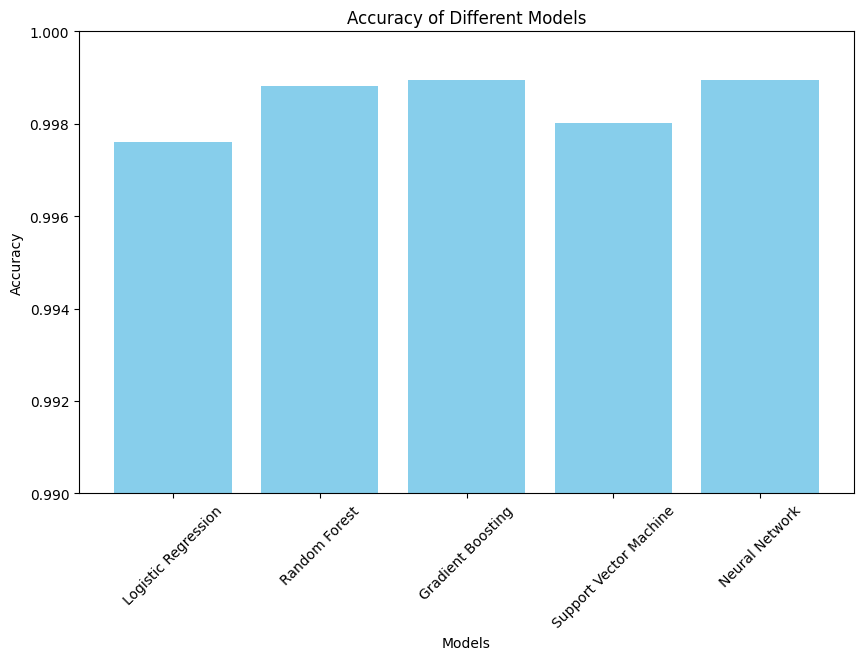

In [ ]:
import matplotlib.pyplot as plt

# Extract model names and accuracy scores
model_names = list(accuracies.keys())
accuracy_scores = list(accuracies.values())

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0.99, 1)  # Set y-axis limits to better visualize differences
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

#**Undersampling**

<Axes: ylabel='Frequency'>

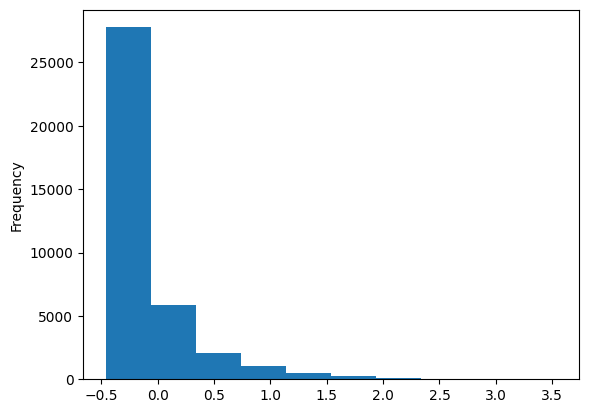

In [ ]:
df['logAmount'] = np.log(df['Amount']+1)
df['logAmount'].sort_values().plot.hist()

In [ ]:
from sklearn.preprocessing import StandardScaler
df['normAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape (-1,1))
df = df.drop (['Time', 'Amount','logAmount'], axis = 1);

In [ ]:
print(df.columns)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 'normAmount'],
      dtype='object')


In [ ]:
number_records_fraud = len (df[df.Class==1])
fraud_indices = np.array (df[df.Class==1].index)
normal_indices = np.array (df[df.Class==0].index)

In [ ]:
random_normal_indices = np.random.choice (normal_indices, number_records_fraud, replace = False )
under_sample_indices = np.concatenate ([fraud_indices, random_normal_indices])

In [ ]:
under_sample_data = df.iloc[under_sample_indices,:]
X_undersample = under_sample_data.iloc [:, under_sample_data.columns != 'Class'];
y_undersample = under_sample_data.iloc [:, under_sample_data.columns == 'Class'];

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.3, random_state = 0)
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split (X_undersample,y_undersample, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.metrics import recall_score
from sklearn.neural_network import MLPClassifier

In [ ]:
print(df.columns)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 'normAmount'],
      dtype='object')


In [ ]:
print(X_test.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
